In [1]:
#importing required liberiries
import numpy as np 
import matplotlib.pyplot as plt
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation
# as we're in 2D we will be doing some 3D plotting
from mpl_toolkits.mplot3d import Axes3D
# and using some colormaps
from matplotlib import cm
# and we will create some animations!
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, PillowWriter  
from IPython.display import HTML
from pprint import pprint
import pandas as pd
from io import StringIO

In [2]:
'''
find_dimensions(p)

p : total Number of processors

In the following function
we devided the total number of processors 
to rows and columns where p = rows * columns

return 
rows : total number of rows 
columns: total number of columns 
'''
def find_dimensions(p): #A bit brute force - this can definitely be made more efficient!
    min_gap = p
    top = int(np.sqrt(p) + 1)
    for i in range(1,top+1):
        if (p % i == 0):
            gap = abs((p / i) - i)

            if (gap < min_gap):
                min_gap = gap
                rows = i
                columns = p / i
    return int(rows), int(columns)
'''
id_to_index(id, rows, columns)

id : id number
rows : total number of rows (from previous function)
columns: total number of columns (from previous function)

return
id_column : the index of processors in y direction
id_row : the index of processors in x direction

In the following function
give each processors based on its id, index in x, y direction


'''

def id_to_index(id, rows, columns):
    id_column = id % columns
    id_row = id / columns
    return int(id_column), int(id_row)

'''
id_from_index(rows, columns, id_row, id_column)

id_row : the index of processors in x directions 
id_column : the index of processors in x directions 
rows : total number of rows (from previous function)
columns: total number of columns (from previous function)

In the following function
give each processors based on its id, index in x, y direction

return 
id: number of the processor

'''

def id_from_index(rows, columns, id_row, id_column):
    if (id_row >= rows or id_row < 0):
        return -1
    if (id_column >= columns or id_column < 0):
        return -1
    id = id_row * columns + id_column;
    return int(id)

In [3]:
'''
read_file_np(it, p):
it : timestep
p : total number of processors


In the following function we tried to read files
using np.loadtxt based on number of id 
and then collected them in a numpy array using 
vstack and hstack. 

vstack : used to stack arrays from their column
hstack : used to stack arrays from their rows

firstly, processors which are in on rows stack together
using vstack and then all the columns in a rows hstack to elements in below rows.

parameters and variables:

data_initial : ndarray to store stacked first rows(all columns)
df : ndarray creating to store loading files data
data_col : ndarray to stack the elements(columns) in a row using vstack

return:

data : ndarray contains all data from different processors

'''
def read_file_np(it, p):
    rows, columns = find_dimensions(p)
    for n in range(0, p):
        for i in range(rows):
            if (i == 0):
                for j in range(columns):
                    id = id_from_index(rows, columns, i, j)
                    file_address = 'out/output_' + str(it) + '_' + str(id) + '.dat'
                    df = np.loadtxt(file_address)
                    if(j == 0):
                        data_initial = np.append(df)
                    if (j > 0):
                        data_initial.vstack(df)
            if (i == 1):
                for j in range(columns):
                    id = id_from_index(rows, columns, i, j)
                    file_address = 'out/output_' + str(it) + '_' + str(id) + '.dat'
                    df = np.loadtxt(file_address) 
                    data_col= np.append(df)
                    if (j > 0):
                        data_col.vstack(df)
                data_col.hstack(data_initial)
            if (i > 1):
                for j in range(columns):
                    id = id_from_index(rows, columns, i, j)
                    file_address = 'out/output_' + str(it) + '_' + str(id) + '.dat'
                    df = np.loadtxt(file_address) 
                    data_col= np.append(df)
                    if (j > 0):
                        data_col.vstack(df)
        data.hstack(data_col)
    return data

In [4]:
def read_file(it):
    file_address = 'out/output_' + str(it) + '.dat'
    df = np.loadtxt(file_address)
    return df

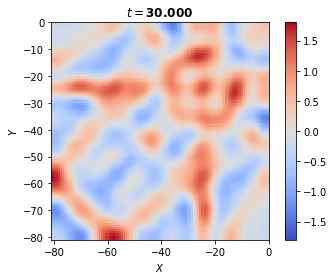

In [5]:
# Implementation of matplotlib function
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
      
import numpy as np
import matplotlib.pyplot as plt

 #space increment
dt=0.04 #time increment
Nx = 100
Ny = 100
tmin=0.0 #initial time
tmax=30.0 #simulate until
xmin=0 #left bound
xmax=10.0 #right bound...assume packet never reaches boundary
xmin=0 #left bound
xmax=10.0 #right bound...assume packet never reaches boundary
ymin=0 #left bound
ymax=10.0 #right bound...assume packet never reaches boundary
dx=(xmax - xmin)/Nx-1
dy=(ymax - ymin)/Ny-1

x, y = np.mgrid[0:Nx:10, 0:Ny:10]
x = dx*x
y = dy*y
def animate(i):
    z = read_file(i)
    z_min, z_max = -np.abs(z).max(), np.abs(z).max()
    c = plt.imshow(z, cmap ='coolwarm', vmin = z_min, vmax = z_max,
            extent =[x.min(), x.max(), y.min(), y.max()],
            interpolation ='nearest', origin ='lower')
    plt.colorbar(c)
    plt.xlabel('$X$')
    plt.ylabel('$Y$')
    t = i *0.04
    plt.title('$t=${0:.3f}'.format(t), fontweight ="bold")
    plt.gca()

animate(750)
plt.savefig('750.png')
#animate(100)
#animate(400)
#animate(750)

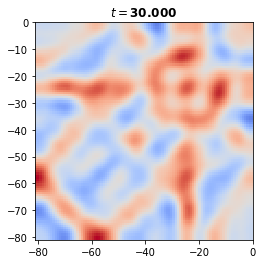

In [8]:
# Implementation of matplotlib function
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
      
import numpy as np
import matplotlib.pyplot as plt

 #space increment
dt=0.04 #time increment
Nx = 100
Ny = 100
tmin=0.0 #initial time
tmax=30.0 #simulate until
xmin=0 #left bound
xmax=10.0 #right bound...assume packet never reaches boundary
xmin=0 #left bound
xmax=10.0 #right bound...assume packet never reaches boundary
ymin=0 #left bound
ymax=10.0 #right bound...assume packet never reaches boundary
dx=(xmax - xmin)/Nx-1
dy=(ymax - ymin)/Ny-1

x, y = np.mgrid[0:Nx:10, 0:Ny:10]
x = dx*x
y = dy*y
fig = plt.figure() 

# function to create animation
def animate(i):
    z = read_file(i)
    z_min, z_max = -np.abs(z).max(), np.abs(z).max()
    c = plt.imshow(z, cmap ='coolwarm', vmin = z_min, vmax = z_max,
                extent =[x.min(), x.max(), y.min(), y.max()],
                interpolation ='nearest', origin ='lower')
    t = i *0.04
    plt.title('$t=${0:.3f}'.format(t), fontweight ="bold")

anim = animation.FuncAnimation(fig, animate, frames = np.arange(0,751), interval = 70)
#Display the resulting animated wave map, which shows how wave amplitude changes over time.
# converting to an html5 video
#HTML(anim.to_jshtml())

f = r"C:\Users\LENOVO C740\Desktop\animation.gif" 
writergif = animation.PillowWriter(fps=30) 
anim.save(f, writer=writergif)
